### Исходная функция

In [20]:
import numpy as np

def func(x):
    return 1/np.sqrt(np.power(x,2)+1)
def func_2(x):
    return 1/np.sqrt(x)
exact_int2 = 4
exact_int = np.arcsinh(4) -np.arcsinh(1)

### Интегрирование

Метод Симпсона

In [2]:
def int_simps(f,a,b):
    return (b-a)/6*(f(a)+4*f((a+b)/2)+f(b))

Метод Гаусса по 3-м точкам

In [3]:
import numpy as np

uzli_kanon = [-np.sqrt(3/5),0,np.sqrt(3/5)]

def int_gauss(f, a, b):
    uzli_ab = list(map(lambda y:((a+b)/2+(b-a)/2*y),uzli_kanon))
    c_kanon = [5/9,8/9,5/9]
    f_uzli_ab = list(map(f,uzli_ab))
    # Мы вынесли множитель (b-a)/2 за скобки, поэтому веса у нас канонические.
    return (b-a)/2*np.inner(f_uzli_ab,c_kanon)


In [4]:
import numpy as np

def integrate(f,a,b,n,intf):
    sum = 0
    parts = np.linspace(a,b,num=n)
    for i in range(0,n-1):
        sum += intf(f,parts[i],parts[i+1])
    return sum

### Погрешности

<IPython.core.display.Javascript object>


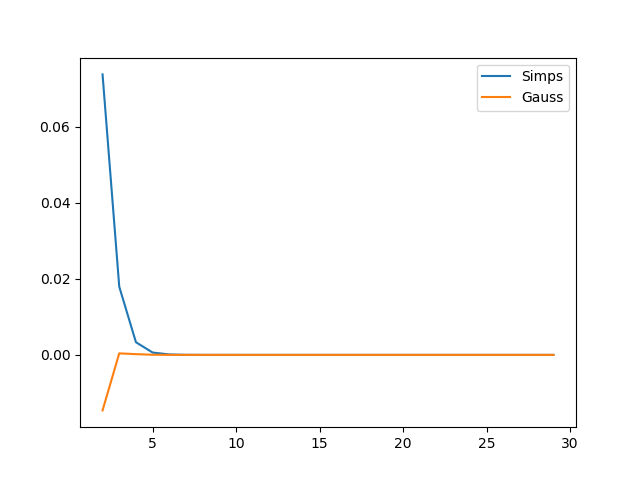

In [7]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

n = range(2,30)
integral_by_simps = [exact_int - integrate(func,0,4,t,int_simps) for t in n]
integral_by_gauss = [exact_int - integrate(func,0,4,t,int_gauss) for t in n]
plt.plot(n, integral_by_simps, label="Simps")
plt.plot(n, integral_by_gauss, label="Gauss")

plt.legend()
print(integral)

Правило Рунге для функции 
$$\frac{1}{\sqrt{x}}$$ 

Для данной функции __p__ считается без проблем.

Для Симпсона — $p = 4$

Для Гаусса — $p = 6$

In [25]:
import numpy as np
from IPython.display import HTML, display
import tabulate
max_n = 10
n = range(1,max_n)

int_by_simps = [integrate(func_2,1,9,2**t,int_simps) for t in n]
int_by_gauss = [integrate(func_2,1,9,2**t,int_gauss) for t in n]

eps_by_simps = [abs(exact_int2 - int_by_simps[t-1]) for t in n]
eps_by_gauss = [abs(exact_int2 - int_by_gauss[t-1]) for t in n]

delta_by_simps = [int_by_simps[i+1] - int_by_simps[i] for i in range(0,max_n - 2)]
delta_by_gauss = [int_by_gauss[i+1] - int_by_gauss[i] for i in range(0,max_n - 2)]


p_by_simps = [np.log2(delta_by_simps[i]/delta_by_simps[i+1]) for i in range(0,max_n - 3)]
p_by_gauss = [np.log2(delta_by_gauss[i]/delta_by_gauss[i+1]) for i in range(0,max_n - 3)]

table = list(zip([2**t for t in n],eps_by_simps[2:],eps_by_gauss[2:],delta_by_simps[1:],delta_by_gauss[1:],p_by_simps,p_by_gauss))


display(HTML(tabulate.tabulate(table,headers = ["N","E_Simps","E_Gauss","D_Simps","D_Gauss","P_Simps","P_Gauss"], tablefmt='html')))


N,E_Simps,E_Gauss,D_Simps,D_Gauss,P_Simps,P_Gauss
2,0.000754004,1.37392e-05,-0.0101873,0.000534049,3.89899,4.99131
4,4.69654e-05,2.55653e-07,-0.000707039,1.34835e-05,3.84884,5.3077
8,2.80115e-06,4.01093e-09,-4.41642e-05,2.51642e-07,4.00084,5.74368
16,1.67942e-07,6.02425e-11,-2.6332e-06,3.95068e-09,4.06799,5.99313
32,1.0227e-08,9.11271e-13,-1.57715e-07,5.93312e-11,4.06142,6.05717
64,6.30098e-10,1.46549e-14,-9.59693e-09,8.96616e-13,4.03861,6.04816
128,3.90878e-11,8.88178e-16,-5.9101e-10,1.37668e-14,4.02132,6.02523


Правило Рунге для функции из задания

Используя метод _Гаусса_ у нас возникают значительные ошибки при подсчёте __p__. Но точность и скорость сходимости у _Гаусса_ больше.

In [24]:
import numpy as np
from IPython.display import HTML, display
import tabulate
max_n = 12
n = range(0,max_n)

int_by_simps = [integrate(func,1,4,2**t,int_simps) for t in n]
int_by_gauss = [integrate(func,1,4,2**t,int_gauss) for t in n]

eps_by_simps = [abs(exact_int - int_by_simps[t-1]) for t in n]
eps_by_gauss = [abs(exact_int - int_by_gauss[t-1]) for t in n]

p_by_simps = [np.log2(eps_by_simps[i]/eps_by_simps[i+1]) for i in range(0,max_n - 3)]
p_by_gauss = [np.log2(eps_by_gauss[i]/eps_by_gauss[i+1]) for i in range(0,max_n - 3)]

table = list(zip([2**t for t in range(2,max_n)],eps_by_simps[2:],eps_by_gauss[2:],p_by_simps,p_by_gauss))


display(HTML(tabulate.tabulate(table,headers = ["N","E_Simps","E_Gauss","P_Simps","P_Gauss"], tablefmt='html')))


N,E_Simps,E_Gauss,P_Simps,P_Gauss
4,0.0042636,0.000235697,-49.1091,-49.4716
8,4.34384e-05,2.52129e-06,8.1527,12.3298
16,2.93803e-06,1.78167e-08,6.61696,6.54662
32,1.53096e-07,1.80919e-10,3.88605,7.14479
64,8.55051e-09,2.30704e-12,4.26234,6.62174
128,5.03411e-10,3.30846e-14,4.16228,6.29315
256,3.0514e-11,4.44089e-16,4.0862,6.12374
512,1.8785e-12,2.22045e-16,4.04419,6.21917
1024,1.16351e-13,4.44089e-16,4.02182,1


### Графики

<IPython.core.display.Javascript object>


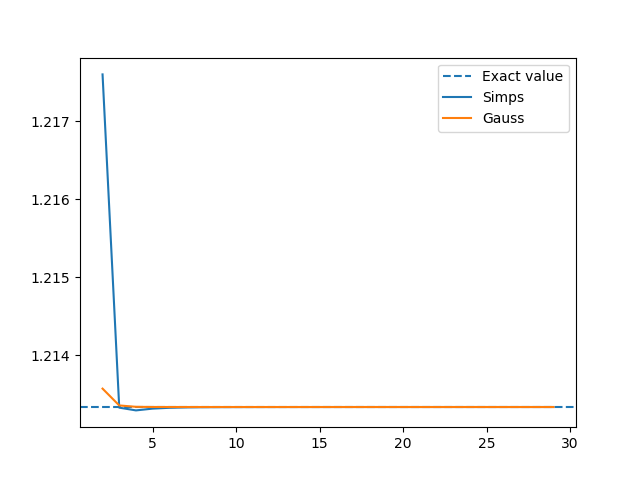

<function print>

In [21]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

n = range(2,30)
integral_by_simps = [integrate(func,1,4,t,int_simps) for t in n]
integral_by_gauss = [integrate(func,1,4,t,int_gauss) for t in n]
plt.axhline(y = exact_int, linestyle="--", label="Exact value")
plt.plot(n, integral_by_simps, label="Simps")
plt.plot(n, integral_by_gauss, label="Gauss")
plt.legend()
print

График функции и её производных, чтобы убедится в её гладкости.

<IPython.core.display.Javascript object>


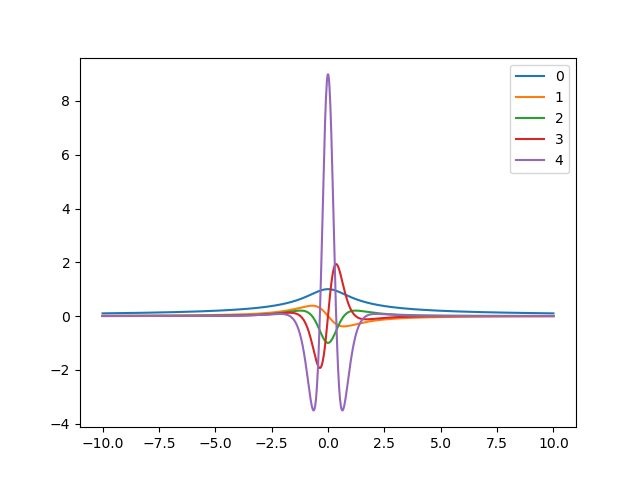

In [15]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import sympy as sym
def p():
    x = sym.Symbol("x");
    f = 1/sym.sqrt(x**2+1)
    n = np.linspace(-10,10,1000)
    func = [sym.lambdify(x,sym.diff(f,x,t)) for t in range(0,5)]
    for der in range(0,5):
        plt.plot(n, [func[der](t) for t in n], label=str(der))
    plt.legend()
    plt.show()
p()    